In [1]:
#set up the graphing configuration 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as graph
%matplotlib inline
graph.rcParams['figure.figsize'] = (15,5)
graph.rcParams["font.family"] = 'DejaVu Sans'
graph.rcParams["font.size"] = '12'
graph.rcParams['image.cmap'] = 'rainbow'
import pandas as pd

dataset = pd.read_csv('football data.txt', index_col = False, sep = '\t', header = 0)

print(dataset.head(10))

   average_goals_per_match  won_competition
0                 2.422870                1
1                 2.824478                1
2                 0.571688                0
3                 1.055028                0
4                 0.394192                0
5                 0.754099                0
6                 0.962960                0
7                 1.994728                0
8                 0.456755                0
9                 0.525435                0


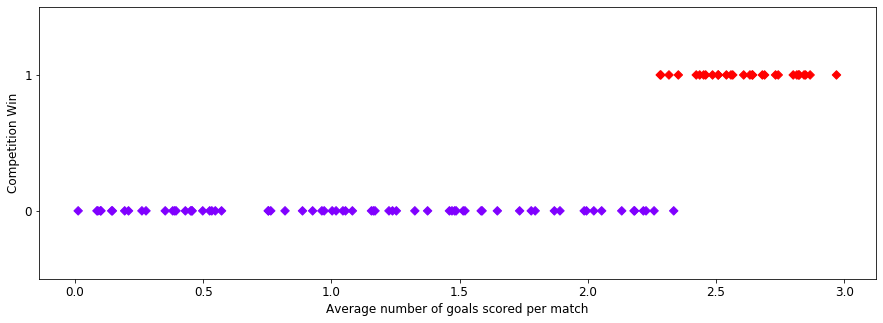

In [2]:
train_Y = dataset['won_competition']
train_X = dataset['average_goals_per_match']

graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')

graph.yticks([0,1]), ['No', 'Yes']
graph.ylabel("Competition Win")
graph.ylim([-0.5, 1.5])
graph.xlabel("Average number of goals scored per match")

graph.show()

We can see from this graph that generally, when our team has a good score average, they tend to win the competition.

How can we predict whether the team will win this season? Let's apply AI to this problem, by making a logisitic regression model using this data and then graph it. This will tell us whether we will likely win this season.

In [3]:
import numpy as np
from sklearn import linear_model

#build a logistic regression model
#clf = classifier
clf = linear_model.LogisticRegression()

#This step fits (calculates the mode). Using the feature (x - number of goals scored) and the outcome/label (y -won / lost)
clf.fit(train_X[:, np.newaxis], train_Y)

#This works out the loss
def sigmoid(train_X):
    return 1 / (1 +np.exp(-train_X))
X_test = np.linspace(0,3,300)
loss = sigmoid(X_test * clf.coef_ +clf.intercept_).ravel()

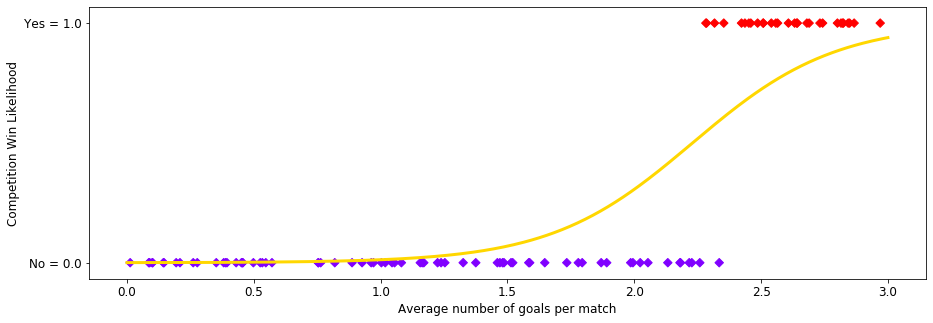

In [4]:
#makes the graph. The data points
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')

#The curve
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

#Define the y-axis
graph.yticks([0,1], ['No = 0.0', 'Yes = 1.0'])
graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

The yellow line is the logistic regression model

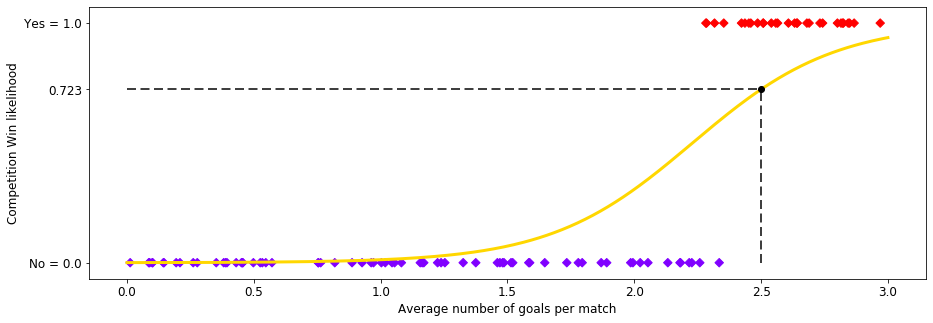

In [5]:
#below number is the number of goals in a match this year (0 - 3)
p = 2.5

probOfWinning = clf.predict_proba([[p]])[0][1]

#Prints out the result
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning, 3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') #result point
graph.plot(np.linspace(0, p, 2), np.full([2], probOfWinning), dashes = [6,3],color = 'black') #dashes lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2),dashes = [6,3],color = 'black')#dashes lines (to x-axis)

graph.ylabel("Competition Win likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

Probability of winning this year
90.76086679247538%


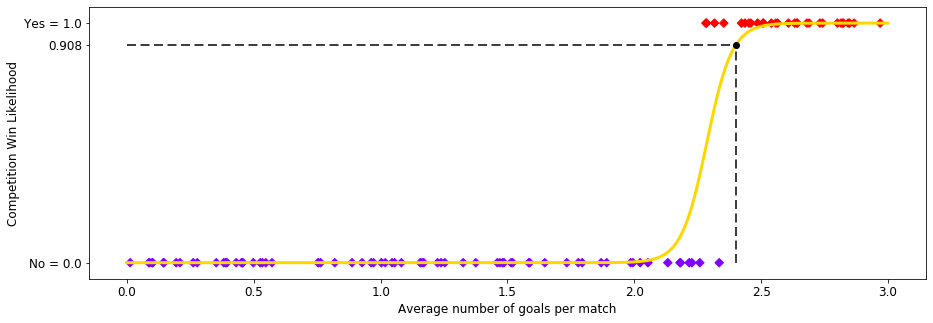

In [7]:
import numpy as np
from sklearn import linear_model

p = 2.4

# build the new logistic regression model.
# The C=200 is where we change the decision boundary.

clf = linear_model.LogisticRegression(C=200)

clf.fit(train_X[:, np.newaxis], train_Y)

# This works out the loss
def sigmoid(train_X):
    return 1 / (1 + np.exp(-train_X))
X_test = np.linspace(0, 3, 300)
loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

# This makes the prediction for the chosen number of goals.
probOfWinning = clf.predict_proba([[p]])[0][1]

# This prints out the result.
print("Probability of winning this year")
print(str(probOfWinning * 100) + "%")

# This plots the result.
graph.scatter(train_X, train_Y, c = train_Y, marker = 'D')
graph.yticks([0, probOfWinning, 1], ['No = 0.0', round(probOfWinning,3), 'Yes = 1.0'])
graph.plot(X_test, loss, color = 'gold', linewidth = 3)

graph.plot(p, probOfWinning, 'ko') # result point
graph.plot(np.linspace(0, p, 2), np.full([2],probOfWinning), dashes = [6, 3], color = 'black') # dashed lines (to y-axis)
graph.plot(np.full([2],p), np.linspace(0, probOfWinning, 2), dashes = [6, 3], color = 'black') # dashed lines (to x-axis)

graph.ylabel("Competition Win Likelihood")
graph.xlabel("Average number of goals per match")
graph.show()

This graph shows that with a 2.4 goals per match, the probability that the team is going to win this year is 90.8 percent